In [469]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import spotipy
from matplotlib import style
from spotipy import util
from spotipy.oauth2 import SpotifyClientCredentials 
API_LIMIT=50


In [470]:
client_id = '1e02e637befc41bcbbe8ca8bf8718ace' #Need to create developer profile
client_secret = '55e3559ab33f455bbd97f77afcad344c'
username = 'basedgodcowell' #Store username
scope = 'playlist-modify-public'
redirect_uri='https://api-university.com/'
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, 
client_secret=client_secret)#Create manager for ease
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)
token = util.prompt_for_user_token(username, scope, client_id, 
client_secret, redirect_uri)


In [471]:
playlist_name = "Your Top Songs 2018"
playlist_name_2="music i hate"
# Get token



In [472]:
playlists_results = sp.user_playlists(username)
playlist_ids = [playlist['id'] for playlist in playlists_results['items'] if playlist['name'] == playlist_name]

if not playlist_ids:
    raise Exception("Cannot find playlist named: {}".format(playlist_name))
else:
    print(playlist_ids)

['37i9dQZF1EjsNYt9m9tUXV']


In [473]:
#Connect to the best playlist, like ever 
playlist_id ='37i9dQZF1EjsNYt9m9tUXV'
playlist = sp.user_playlist(username,playlist_id)

#Extract list of songs/tracks
tracks = playlist["tracks"];
songs = tracks["items"];

track_ids = []
track_names = []

In [214]:
playlists_results = sp.user_playlists(username)
playlist_ids = [playlist['id'] for playlist in playlists_results['items'] if playlist['name'] == playlist_name_2]

if not playlist_ids:
    raise Exception("Cannot find playlist named: {}".format(playlist_name_2))
else:
    print(playlist_ids)

['5sR81QONug6H59399wOLAD']


In [474]:
tracks_results = sp.user_playlist(username, playlist_ids[0])

df_tracks = pd.DataFrame([[t["track"]["id"], t["track"]["name"], t["track"]["artists"][0]["id"], 
                           t["track"]["artists"][0]["name"], t["track"]["album"]["name"], t["track"]["popularity"]] 
                          for t in tracks_results['tracks']['items']], 
                         columns=["id", "song_name", "artist_id", "artist_name", "album_name", "popularity"]) 


df_tracks.head(100)

,id,song_name,artist_id,artist_name,album_name,popularity
0,3jITkO2u1H36DMiMAMJWHj,Count Bassy,6guC9FqvlVboSKTI77NG2k,Dance Gavin Dance,Artificial Selection,58
1,3nAlqgw8MIg8l4ccMXAoYP,Royal Beggars,3ZztVuWxHzNpl0THurTFCv,Architects,Royal Beggars,0
2,6mTDDeBcUFOqa7xD8GXBjj,Lucid,0v2e0oznnTaIXKLGKHphfX,Polaris,The Mortal Coil,50
3,6Tj3kqZsJvmaWOR65M60M7,Vultures,3qyg72RGnGdF521zMU02u9,Northlane,Vultures,37
4,7FJMv80ewZoKtVoIZP29Qc,Covert,48zUWAXpgEXfpttz23pCNQ,Oceans Ate Alaska,Hikari,42
5,4IQr1kf4wKTnNrFZ5JEKEL,Biblee,2yPTApi5ZT9yYsSoD98b1X,Secret Band,Secret Band,26
6,4S1fs14Bb9lNf1R77eqMtJ,Tremor,5pqvAI85RMxL9K0xHvSwGu,Currents,The Place I Feel Safest,0
7,3BWA04D12zDCuDCRQUrmC0,Entertainment Lies,0XblvrTo6mnHOxWIP1t5T6,Hail The Sun,Culture Scars,31
8,3NuN59jpH3B5cNa2M4r7XG,BOOGIE,1Bl6wpkWCQ4KVgnASpvzzA,BROCKHAMPTON,SATURATION III,65
9,6KQoSDooTDtw3qPeizaNWj,The Familiar,3z8aGzEIL6yA1mFXNFf9E3,Eidola,"To Speak, to Listen",26


In [475]:
def _get_artists_df(sp, artist_ids):
    """
    This is an helper method to get artist's information with pagination from artist ids.
    It returns a Pandas dataframe
    """

    artist_list = []
    i = 0

    while artist_ids:
        print("Call #{} for artists".format(i + 1))
        artists_results = sp.artists(artist_ids[:API_LIMIT])

        artist_list += [[t["id"], t["genres"], t["popularity"]] for t in artists_results["artists"]]

        artist_ids = artist_ids[API_LIMIT:]
        i += 1

    df_artists = pd.DataFrame(artist_list, columns=["artist_id", "artist_genres", "artist_popularity"])

   

    return df_artists

In [476]:

artist_ids = df_tracks["artist_id"].unique().tolist()
df_artists = _get_artists_df(sp, artist_ids)
df_artists.head()

Call #1 for artists


,artist_id,artist_genres,artist_popularity
0,6guC9FqvlVboSKTI77NG2k,"[metalcore, pixie, sacramento indie, screamo]",70
1,3ZztVuWxHzNpl0THurTFCv,"[mathcore, melodic metalcore, metalcore, progr...",66
2,0v2e0oznnTaIXKLGKHphfX,"[australian metalcore, australian post-hardcor...",58
3,3qyg72RGnGdF521zMU02u9,"[australian metalcore, deep melodic metalcore,...",61
4,48zUWAXpgEXfpttz23pCNQ,"[melodic metalcore, metalcore, post-screamo, p...",50


In [10]:
def _get_features_df(sp, track_ids):
    """
    This is an helper method to get track's features with pagination from track ids.
    It returns a Pandas dataframe
    """

    feature_list = []
    i = 0
    while track_ids:
        print("Call #{} for audio features".format(i + 1))
        features_results = sp.audio_features(track_ids[:API_LIMIT])

        feature_list += features_results
        
        track_ids = track_ids[API_LIMIT:]
        i += 1

    df_features = pd.DataFrame(feature_list)[["id", "analysis_url", "duration_ms", "acousticness", "danceability", 
                                              "energy", "instrumentalness", "liveness", "loudness", "valence", 
                                              "speechiness", "key", "mode", "tempo", "time_signature"]]
    
    
    return df_features

In [477]:
track_ids = df_tracks["id"].unique().tolist()
df_features = _get_features_df(sp, track_ids)
df_features.head()

Call #1 for audio features
Call #2 for audio features


,id,analysis_url,duration_ms,acousticness,danceability,energy,instrumentalness,liveness,loudness,valence,speechiness,key,mode,tempo,time_signature
0,3jITkO2u1H36DMiMAMJWHj,https://api.spotify.com/v1/audio-analysis/3jIT...,245069,0.006620,0.484,0.928,0.000000,0.733,-3.618,0.440,0.0574,1,1,135.934,4
1,3nAlqgw8MIg8l4ccMXAoYP,https://api.spotify.com/v1/audio-analysis/3nAl...,241587,0.000269,0.376,0.870,0.000373,0.128,-4.566,0.132,0.0578,11,0,178.111,4
2,6mTDDeBcUFOqa7xD8GXBjj,https://api.spotify.com/v1/audio-analysis/6mTD...,239853,0.000049,0.490,0.991,0.000115,0.316,-3.917,0.142,0.1490,10,0,101.978,4
3,6Tj3kqZsJvmaWOR65M60M7,https://api.spotify.com/v1/audio-analysis/6Tj3...,227733,0.000030,0.479,0.974,0.034200,0.307,-6.645,0.239,0.1440,9,1,125.930,4
4,7FJMv80ewZoKtVoIZP29Qc,https://api.spotify.com/v1/audio-analysis/7FJM...,193373,0.000112,0.262,0.874,0.010100,0.133,-4.629,0.153,0.0641,0,1,104.642,4


In [479]:
df_cur = df_features.merge(df_tracks, on="id")
df_cur = df_cur.merge(df_artists, on="artist_id")

# Create a new column with full name of the song
df_cur["full_name"] = df_cur["artist_name"] + " -- " + df_cur["song_name"]

df_cur.head(10)

,id,analysis_url,duration_ms,acousticness,danceability,energy,instrumentalness,liveness,loudness,valence,...,tempo,time_signature,song_name,artist_id,artist_name,album_name,popularity,artist_genres,artist_popularity,full_name
0,3jITkO2u1H36DMiMAMJWHj,https://api.spotify.com/v1/audio-analysis/3jIT...,245069,0.006620,0.484,0.928,0.000000,0.7330,-3.618,0.440,...,135.934,4,Count Bassy,6guC9FqvlVboSKTI77NG2k,Dance Gavin Dance,Artificial Selection,58,"[metalcore, pixie, sacramento indie, screamo]",70,Dance Gavin Dance -- Count Bassy
1,4ZJ9ryocsV59FOvgxt6FTS,https://api.spotify.com/v1/audio-analysis/4ZJ9...,238985,0.003200,0.529,0.930,0.001580,0.2870,-4.161,0.365,...,109.005,3,Son of Robot,6guC9FqvlVboSKTI77NG2k,Dance Gavin Dance,Son of Robot,36,"[metalcore, pixie, sacramento indie, screamo]",70,Dance Gavin Dance -- Son of Robot
2,2m2i3FBUwZxOCGPgj039PO,https://api.spotify.com/v1/audio-analysis/2m2i...,209028,0.001230,0.421,0.982,0.000002,0.1620,-3.569,0.502,...,195.934,4,Midnight Crusade,6guC9FqvlVboSKTI77NG2k,Dance Gavin Dance,Midnight Crusade,38,"[metalcore, pixie, sacramento indie, screamo]",70,Dance Gavin Dance -- Midnight Crusade
3,73XEi2vkcuHWF2m9wiOfbu,https://api.spotify.com/v1/audio-analysis/73XE...,265606,0.072900,0.256,0.965,0.000000,0.2740,-3.041,0.548,...,157.034,3,Care,6guC9FqvlVboSKTI77NG2k,Dance Gavin Dance,Artificial Selection,59,"[metalcore, pixie, sacramento indie, screamo]",70,Dance Gavin Dance -- Care
4,0cbAF0iJ9bqLtpNuEzeTA4,https://api.spotify.com/v1/audio-analysis/0cbA...,190957,0.008460,0.489,0.978,0.000106,0.0645,-3.015,0.463,...,158.016,4,Slouch,6guC9FqvlVboSKTI77NG2k,Dance Gavin Dance,Artificial Selection,46,"[metalcore, pixie, sacramento indie, screamo]",70,Dance Gavin Dance -- Slouch
5,3YnVu5F9cHmsgygBdx7WTl,https://api.spotify.com/v1/audio-analysis/3YnV...,224467,0.014500,0.609,0.953,0.000009,0.1410,-6.523,0.552,...,110.031,4,Semi-Charmed Life,6guC9FqvlVboSKTI77NG2k,Dance Gavin Dance,Semi-Charmed Life,53,"[metalcore, pixie, sacramento indie, screamo]",70,Dance Gavin Dance -- Semi-Charmed Life
6,639JHsrGV8A9qUYSXhOwsw,https://api.spotify.com/v1/audio-analysis/639J...,201250,0.088400,0.605,0.968,0.000000,0.3460,-3.044,0.758,...,119.988,4,Summertime Gladness,6guC9FqvlVboSKTI77NG2k,Dance Gavin Dance,Summertime Gladness,54,"[metalcore, pixie, sacramento indie, screamo]",70,Dance Gavin Dance -- Summertime Gladness
7,1nMubX5eLqC7yFiSQ5joFW,https://api.spotify.com/v1/audio-analysis/1nMu...,327589,0.002980,0.238,0.977,0.000000,0.0981,-3.405,0.275,...,138.404,4,Pussy Vultures,6guC9FqvlVboSKTI77NG2k,Dance Gavin Dance,Pussy Vultures,35,"[metalcore, pixie, sacramento indie, screamo]",70,Dance Gavin Dance -- Pussy Vultures
8,3nAlqgw8MIg8l4ccMXAoYP,https://api.spotify.com/v1/audio-analysis/3nAl...,241587,0.000269,0.376,0.870,0.000373,0.1280,-4.566,0.132,...,178.111,4,Royal Beggars,3ZztVuWxHzNpl0THurTFCv,Architects,Royal Beggars,0,"[mathcore, melodic metalcore, metalcore, progr...",66,Architects -- Royal Beggars
9,3wxuMSx9yTAb623ryfMT7B,https://api.spotify.com/v1/audio-analysis/3wxu...,245300,0.000051,0.529,0.943,0.000043,0.1420,-4.446,0.226,...,119.983,4,Gravedigger,3ZztVuWxHzNpl0THurTFCv,Architects,Lost Forever // Lost Together,40,"[mathcore, melodic metalcore, metalcore, progr...",66,Architects -- Gravedigger


In [204]:
df_cur["time_signature"] = df_cur["time_signature"].astype(pd.api.types.CategoricalDtype(categories=[1, 2, 3, 4, 5]))
df_cur["key"] = df_cur["key"].astype(pd.api.types.CategoricalDtype(categories=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]))

In [52]:

def _distplot(df, key, label, x_limits):
    """
    This is an helper method to plot distribution charts
    """
    ax = sns.distplot(df[[key]], bins=30, label=label)
    if x_limits is not None:
        ax.set_xlim(*x_limits)
    plt.title(key)
    plt.legend()
    plt.show()

C:\Users\holyc\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


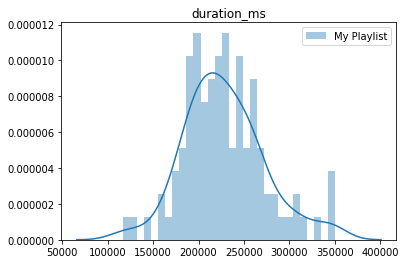

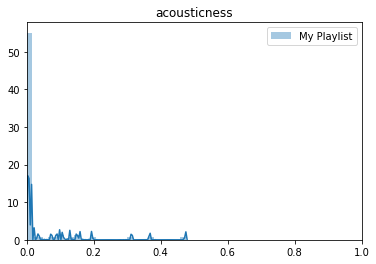

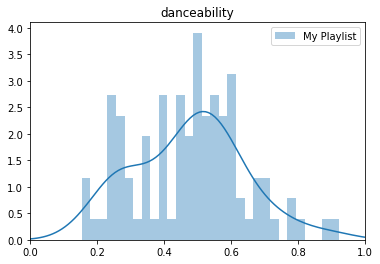

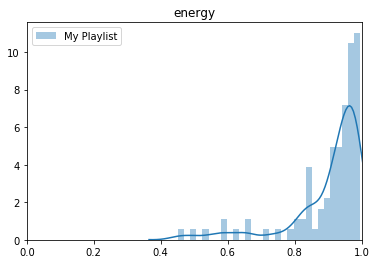

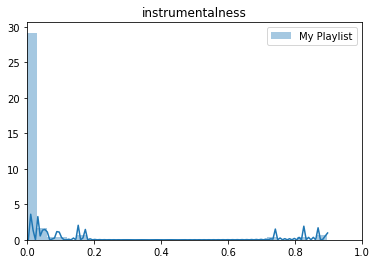

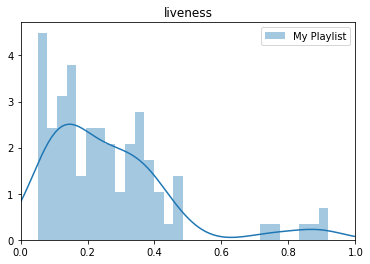

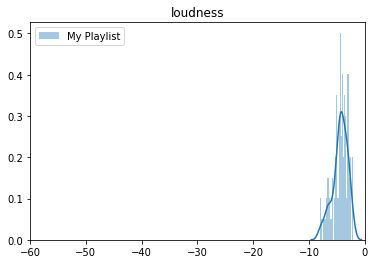

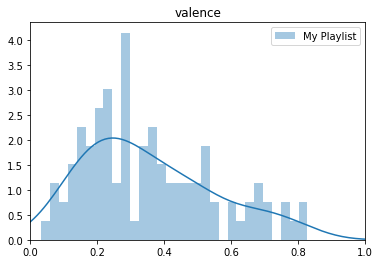

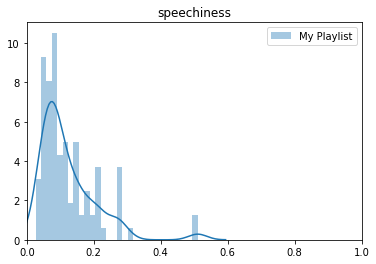

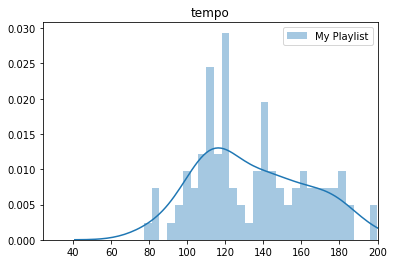

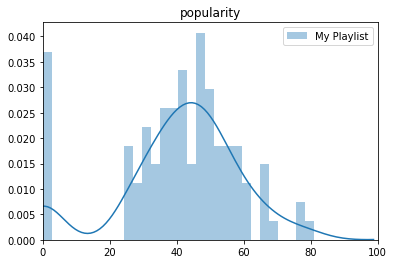

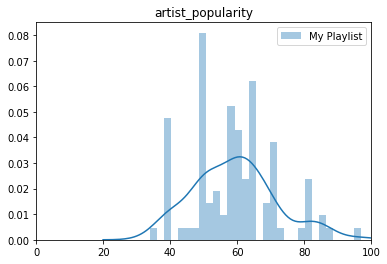

In [205]:
x_limits = {"duration_ms": None, "loudness": (-60, 0), "tempo": (24, 200), "popularity": (0, 100), 
            "artist_popularity": (0, 100)}

for key in ["duration_ms", "acousticness", "danceability", "energy", "instrumentalness", "liveness",
                    "loudness", "valence", "speechiness", "tempo", "popularity", "artist_popularity"]:
    _distplot(df_cur, key, label="My Playlist", x_limits=x_limits.get(key, (0, 1)))

In [54]:
def _countplot(df, key, label):
    """
    This is an helper method to plot count charts
    """
    ax = sns.countplot(data=df, x=key, palette="tab20")
    ax.set_title(label)
    plt.show()

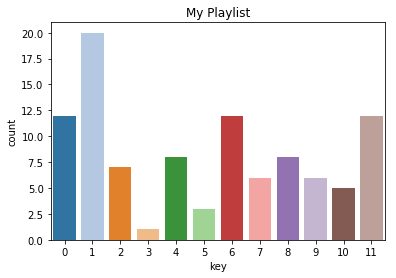

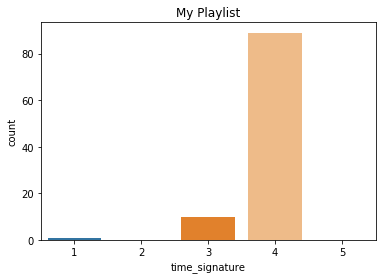

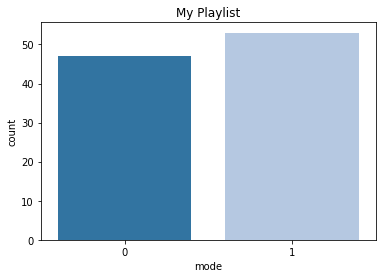

In [55]:
for key in ["key", "time_signature", "mode"]:
    _countplot(df_cur, key, label="My Playlist")

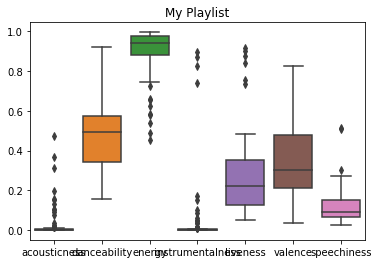

In [206]:
ax = sns.boxplot(data=df_cur[["acousticness", "danceability", "energy", "instrumentalness", "liveness", 
                              "valence", "speechiness"]])
ax.set_title("My Playlist")
plt.show()

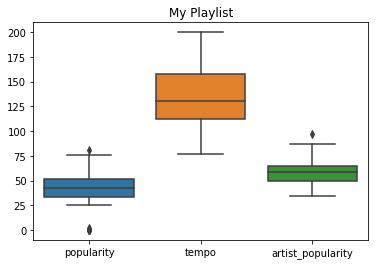

In [207]:
ax = sns.boxplot(data=df_cur[['popularity','tempo','artist_popularity' ]])
ax.set_title("My Playlist")
plt.show()

In [208]:

df_cur.describe()

,duration_ms,acousticness,danceability,energy,instrumentalness,liveness,loudness,valence,speechiness,mode,tempo,popularity,artist_popularity
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,228082.070000,0.024051,0.474360,0.902180,0.041991,0.260671,-4.432370,0.354946,0.122556,0.530000,134.298910,41.120000,59.210000
std,44122.278883,0.073760,0.164522,0.115014,0.165099,0.188273,1.367276,0.193901,0.086800,0.501614,28.736435,17.999035,12.384656
min,116453.000000,0.000003,0.154000,0.452000,0.000000,0.051000,-8.109000,0.033300,0.026100,0.000000,77.217000,0.000000,34.000000
25%,199026.250000,0.000116,0.341500,0.882250,0.000002,0.126250,-5.051000,0.209000,0.063475,0.000000,111.937500,33.000000,50.000000
50%,224993.500000,0.000711,0.491500,0.943000,0.000144,0.222500,-4.299500,0.304000,0.090750,1.000000,130.009000,42.500000,59.000000
75%,252869.750000,0.005302,0.574000,0.975000,0.003148,0.352750,-3.453000,0.476500,0.151750,1.000000,157.596000,52.000000,65.000000
max,350307.000000,0.474000,0.922000,0.996000,0.895000,0.919000,-2.130000,0.828000,0.511000,1.000000,199.890000,81.000000,97.000000


In [215]:
#Connect to the best playlist, like ever 
playlist_id2 ='5sR81QONug6H59399wOLAD'
playlist = sp.user_playlist(username,playlist_id)

#Extract list of songs/tracks
tracks = playlist["tracks"];
songs = tracks["items"];

track_ids = []
track_names = []

In [216]:
tracks_results2 = sp.user_playlist(username, playlist_ids[0])

df_tracks2 = pd.DataFrame([[t["track"]["id"], t["track"]["name"], t["track"]["artists"][0]["id"], 
                           t["track"]["artists"][0]["name"], t["track"]["album"]["name"], t["track"]["popularity"]] 
                          for t in tracks_results2['tracks']['items']], 
                         columns=["id", "song_name", "artist_id", "artist_name", "album_name", "popularity"]) 


df_tracks2.head(100)

,id,song_name,artist_id,artist_name,album_name,popularity
0,0ZUo4YjG4saFnEJhdWp9Bt,Before He Cheats,4xFUf1FHVy696Q1JQZMTRj,Carrie Underwood,Some Hearts,75
1,0VwNdo84DaVYLIkbVO86ND,We Are Never Ever Getting Back Together,06HL4z0CvFAxyc27GXpf02,Taylor Swift,Red (Big Machine Radio Release Special),75
2,11dxtPJKR4E0wlSr0A0t47,Potential Breakup Song,5wugb0kaq0J6nyQ5Xgd17i,Aly & AJ,Insomniatic,62
3,6n9yCXvLhnYMgJIiIcMu7D,Rockstar,6deZN1bslXzeGvOLaLMOIF,Nickelback,All the Right Reasons (Special Edition),69
4,5t1sJQEcAltWjCfGL50aQT,Grave,6bu7CtcOMWcS0BMq7snHW6,Wage War,Pressure,54
5,2mXsZsJBThTaJXbNcg5QD4,Mama's Broken Heart,66lH4jAE7pqPlOlzUKbwA0,Miranda Lambert,Four The Record,66
6,5qmq61DAAOUaW8AUo8xKhh,Truth Hurts,56oDRnqbIiwx4mymNEv7dS,Lizzo,Cuz I Love You (Deluxe),91
7,6OqdF0vHI9xkqswI7EK0cD,Cowboy Casanova,4xFUf1FHVy696Q1JQZMTRj,Carrie Underwood,Play On,59
8,1ZPWWSwCkxKfqdp4H0RFCo,ROXANNE,0vRvGUQVUjytro0xpb26bs,Arizona Zervas,ROXANNE,89
9,4S8d14HvHb70ImctNgVzQQ,I Love It (& Lil Pump),5K4W6rqBFWDnAN6FQUkS6x,Kanye West,I Love It,80


In [217]:

artist_ids = df_tracks2["artist_id"].unique().tolist()
df_artists2 = _get_artists_df(sp, artist_ids)
df_artists2.head()

Call #1 for artists
Call #2 for artists


,artist_id,artist_genres,artist_popularity
0,4xFUf1FHVy696Q1JQZMTRj,"[contemporary country, country, country dawn, ...",76
1,06HL4z0CvFAxyc27GXpf02,"[pop, post-teen pop]",95
2,5wugb0kaq0J6nyQ5Xgd17i,"[dance pop, electropop, girl group, indie popt...",60
3,6deZN1bslXzeGvOLaLMOIF,"[alternative metal, canadian rock, nu metal, p...",80
4,6bu7CtcOMWcS0BMq7snHW6,"[melodic metalcore, metalcore, post-screamo]",65


In [218]:
track_ids = df_tracks2["id"].unique().tolist()
df_features2 = _get_features_df(sp, track_ids)
df_features2.head()

Call #1 for audio features
Call #2 for audio features


,id,analysis_url,duration_ms,acousticness,danceability,energy,instrumentalness,liveness,loudness,valence,speechiness,key,mode,tempo,time_signature
0,0ZUo4YjG4saFnEJhdWp9Bt,https://api.spotify.com/v1/audio-analysis/0ZUo...,199947,0.27100,0.519,0.749,0.000000,0.119,-3.318,0.290,0.0405,6,0,147.905,4
1,0VwNdo84DaVYLIkbVO86ND,https://api.spotify.com/v1/audio-analysis/0VwN...,193147,0.00957,0.628,0.676,0.000027,0.121,-5.911,0.750,0.0916,7,1,85.984,4
2,11dxtPJKR4E0wlSr0A0t47,https://api.spotify.com/v1/audio-analysis/11dx...,219773,0.00082,0.572,0.890,0.009370,0.564,-4.139,0.765,0.0390,6,0,158.038,4
3,6n9yCXvLhnYMgJIiIcMu7D,https://api.spotify.com/v1/audio-analysis/6n9y...,252040,0.04590,0.616,0.910,0.000000,0.343,-3.004,0.693,0.0386,0,1,144.073,4
4,5t1sJQEcAltWjCfGL50aQT,https://api.spotify.com/v1/audio-analysis/5t1s...,194787,0.01160,0.491,0.981,0.000971,0.144,-3.673,0.366,0.1310,7,0,138.015,4


In [465]:
df_cur2 = df_features2.merge(df_tracks2, on="id")
df_cur2 = df_cur2.merge(df_artists2, on="artist_id")

# Create a new column with full name of the song
df_cur2["full_name"] = df_cur2["artist_name"] + " -- " + df_cur2["song_name"]

df_cur2.head(100)

,id,analysis_url,duration_ms,acousticness,danceability,energy,instrumentalness,liveness,loudness,valence,...,tempo,time_signature,song_name,artist_id,artist_name,album_name,popularity,artist_genres,artist_popularity,full_name
0,0ZUo4YjG4saFnEJhdWp9Bt,https://api.spotify.com/v1/audio-analysis/0ZUo...,199947,0.271000,0.519,0.749,0.000000,0.1190,-3.318,0.2900,...,147.905,4,Before He Cheats,4xFUf1FHVy696Q1JQZMTRj,Carrie Underwood,Some Hearts,75,"[contemporary country, country, country dawn, ...",76,Carrie Underwood -- Before He Cheats
1,6OqdF0vHI9xkqswI7EK0cD,https://api.spotify.com/v1/audio-analysis/6Oqd...,236787,0.032800,0.597,0.820,0.000000,0.1190,-2.529,0.5760,...,119.969,4,Cowboy Casanova,4xFUf1FHVy696Q1JQZMTRj,Carrie Underwood,Play On,59,"[contemporary country, country, country dawn, ...",76,Carrie Underwood -- Cowboy Casanova
2,0VwNdo84DaVYLIkbVO86ND,https://api.spotify.com/v1/audio-analysis/0VwN...,193147,0.009570,0.628,0.676,0.000027,0.1210,-5.911,0.7500,...,85.984,4,We Are Never Ever Getting Back Together,06HL4z0CvFAxyc27GXpf02,Taylor Swift,Red (Big Machine Radio Release Special),75,"[pop, post-teen pop]",95,Taylor Swift -- We Are Never Ever Getting Back...
3,11dxtPJKR4E0wlSr0A0t47,https://api.spotify.com/v1/audio-analysis/11dx...,219773,0.000820,0.572,0.890,0.009370,0.5640,-4.139,0.7650,...,158.038,4,Potential Breakup Song,5wugb0kaq0J6nyQ5Xgd17i,Aly & AJ,Insomniatic,62,"[dance pop, electropop, girl group, indie popt...",60,Aly & AJ -- Potential Breakup Song
4,6n9yCXvLhnYMgJIiIcMu7D,https://api.spotify.com/v1/audio-analysis/6n9y...,252040,0.045900,0.616,0.910,0.000000,0.3430,-3.004,0.6930,...,144.073,4,Rockstar,6deZN1bslXzeGvOLaLMOIF,Nickelback,All the Right Reasons (Special Edition),69,"[alternative metal, canadian rock, nu metal, p...",80,Nickelback -- Rockstar
5,5t1sJQEcAltWjCfGL50aQT,https://api.spotify.com/v1/audio-analysis/5t1s...,194787,0.011600,0.491,0.981,0.000971,0.1440,-3.673,0.3660,...,138.015,4,Grave,6bu7CtcOMWcS0BMq7snHW6,Wage War,Pressure,54,"[melodic metalcore, metalcore, post-screamo]",65,Wage War -- Grave
6,2mXsZsJBThTaJXbNcg5QD4,https://api.spotify.com/v1/audio-analysis/2mXs...,177773,0.278000,0.768,0.809,0.000000,0.1390,-4.204,0.7480,...,111.989,4,Mama's Broken Heart,66lH4jAE7pqPlOlzUKbwA0,Miranda Lambert,Four The Record,66,"[contemporary country, country, country dawn, ...",75,Miranda Lambert -- Mama's Broken Heart
7,5qmq61DAAOUaW8AUo8xKhh,https://api.spotify.com/v1/audio-analysis/5qmq...,173325,0.110000,0.715,0.624,0.000000,0.1230,-3.046,0.4120,...,158.087,4,Truth Hurts,56oDRnqbIiwx4mymNEv7dS,Lizzo,Cuz I Love You (Deluxe),91,"[escape room, minnesota hip hop, pop, pop rap,...",88,Lizzo -- Truth Hurts
8,1ZPWWSwCkxKfqdp4H0RFCo,https://api.spotify.com/v1/audio-analysis/1ZPW...,163636,0.052200,0.621,0.601,0.000000,0.4600,-5.616,0.4570,...,116.735,5,ROXANNE,0vRvGUQVUjytro0xpb26bs,Arizona Zervas,ROXANNE,89,[pop rap],86,Arizona Zervas -- ROXANNE
9,4S8d14HvHb70ImctNgVzQQ,https://api.spotify.com/v1/audio-analysis/4S8d...,127947,0.011400,0.901,0.522,0.000000,0.2590,-8.304,0.3290,...,104.053,4,I Love It (& Lil Pump),5K4W6rqBFWDnAN6FQUkS6x,Kanye West,I Love It,80,"[chicago rap, pop rap, rap]",95,Kanye West -- I Love It (& Lil Pump)


In [220]:
df_cur2["time_signature"] = df_cur2["time_signature"].astype(pd.api.types.CategoricalDtype(categories=[1, 2, 3, 4, 5]))
df_cur2["key"] = df_cur2["key"].astype(pd.api.types.CategoricalDtype(categories=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]))

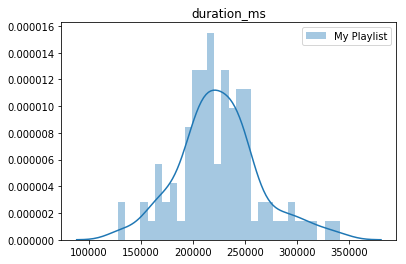

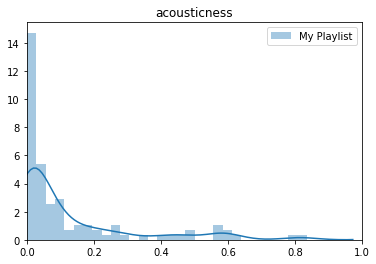

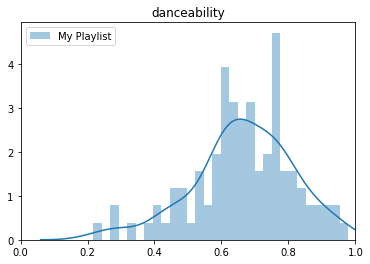

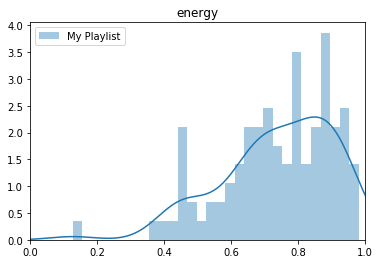

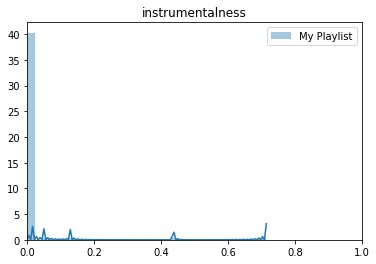

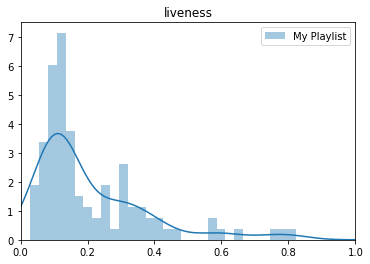

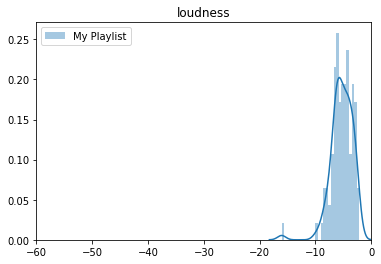

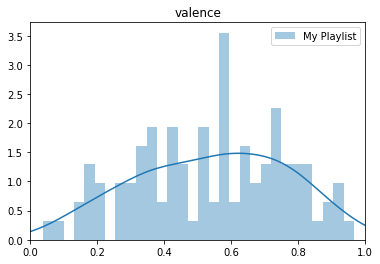

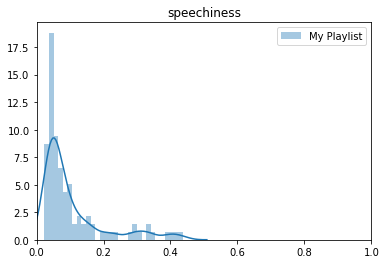

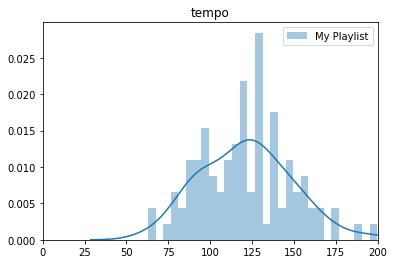

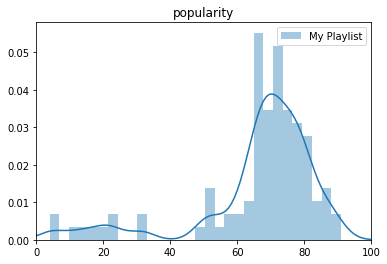

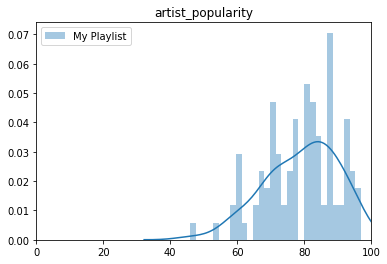

In [221]:
x_limits = {"duration_ms": None, "loudness": (-60, 0), "tempo": (0, 200), "popularity": (0, 100), 
            "artist_popularity": (0, 100)}

for key in ["duration_ms", "acousticness", "danceability", "energy", "instrumentalness", "liveness",
                    "loudness", "valence", "speechiness", "tempo", "popularity", "artist_popularity"]:
    _distplot(df_cur2, key, label="My Playlist", x_limits=x_limits.get(key, (0, 1)))

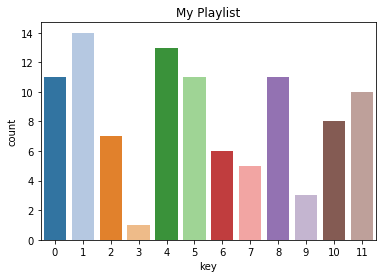

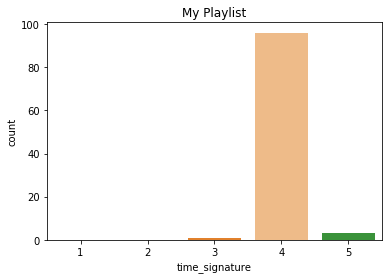

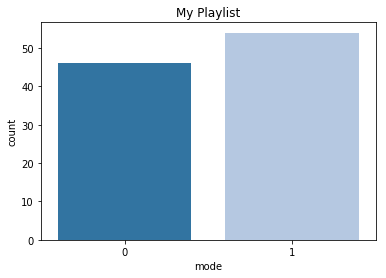

In [222]:
for key in ["key", "time_signature", "mode"]:
    _countplot(df_cur2, key, label="My Playlist")

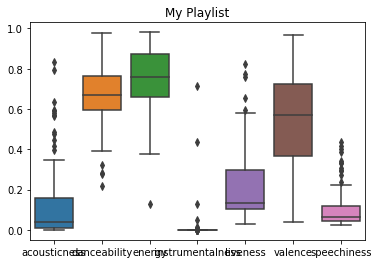

In [223]:
ax = sns.boxplot(data=df_cur2[["acousticness", "danceability", "energy", "instrumentalness", "liveness", 
                              "valence", "speechiness"]])
ax.set_title("My Playlist")
plt.show()

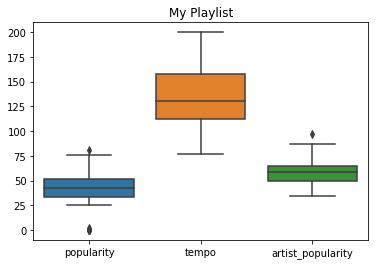

In [224]:
ax = sns.boxplot(data=df_cur[['popularity','tempo','artist_popularity' ]])
ax.set_title("My Playlist")
plt.show()

In [225]:
df_cur2.describe()

,duration_ms,acousticness,danceability,energy,instrumentalness,liveness,loudness,valence,speechiness,mode,tempo,popularity,artist_popularity
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,224692.230000,0.128791,0.663880,0.738590,0.013669,0.208418,-5.285580,0.539151,0.104793,0.540000,121.374680,66.270000,79.060000
std,39288.350802,0.191932,0.150788,0.166966,0.084249,0.168760,1.980102,0.222229,0.098084,0.500908,27.056616,18.470208,10.914563
min,127947.000000,0.000029,0.217000,0.127000,0.000000,0.028500,-16.057000,0.037600,0.023200,0.000000,62.829000,4.000000,46.000000
25%,203139.750000,0.011025,0.595500,0.658750,0.000000,0.103500,-6.320500,0.364750,0.042425,0.000000,99.745000,65.000000,71.000000
50%,221506.500000,0.037600,0.670000,0.757000,0.000000,0.136000,-5.270000,0.569000,0.062850,1.000000,120.038500,71.000000,81.000000
75%,245629.750000,0.158500,0.762750,0.871250,0.000018,0.298000,-3.975000,0.725250,0.117750,1.000000,138.997000,77.000000,87.000000
max,340907.000000,0.835000,0.979000,0.981000,0.715000,0.824000,-2.117000,0.967000,0.438000,1.000000,199.864000,91.000000,97.000000


In [295]:
df_cur['Outcome']=1
df_cur2["Outcome"]=0

In [296]:
df_both = pd.concat([df_cur, df_cur2])

df_both

,id,analysis_url,duration_ms,acousticness,danceability,energy,instrumentalness,liveness,loudness,valence,...,time_signature,song_name,artist_id,artist_name,album_name,popularity,artist_genres,artist_popularity,full_name,Outcome
0,3jITkO2u1H36DMiMAMJWHj,https://api.spotify.com/v1/audio-analysis/3jIT...,245069,0.006620,0.484,0.928,0.000000,0.7330,-3.618,0.4400,...,4,Count Bassy,6guC9FqvlVboSKTI77NG2k,Dance Gavin Dance,Artificial Selection,58,"[emo, metalcore, pixie, sacramento indie, scre...",70,Dance Gavin Dance -- Count Bassy,1
1,4ZJ9ryocsV59FOvgxt6FTS,https://api.spotify.com/v1/audio-analysis/4ZJ9...,238985,0.003200,0.529,0.930,0.001580,0.2870,-4.161,0.3650,...,3,Son of Robot,6guC9FqvlVboSKTI77NG2k,Dance Gavin Dance,Son of Robot,36,"[emo, metalcore, pixie, sacramento indie, scre...",70,Dance Gavin Dance -- Son of Robot,1
2,2m2i3FBUwZxOCGPgj039PO,https://api.spotify.com/v1/audio-analysis/2m2i...,209028,0.001230,0.421,0.982,0.000002,0.1620,-3.569,0.5020,...,4,Midnight Crusade,6guC9FqvlVboSKTI77NG2k,Dance Gavin Dance,Midnight Crusade,38,"[emo, metalcore, pixie, sacramento indie, scre...",70,Dance Gavin Dance -- Midnight Crusade,1
3,73XEi2vkcuHWF2m9wiOfbu,https://api.spotify.com/v1/audio-analysis/73XE...,265606,0.072900,0.256,0.965,0.000000,0.2740,-3.041,0.5480,...,3,Care,6guC9FqvlVboSKTI77NG2k,Dance Gavin Dance,Artificial Selection,59,"[emo, metalcore, pixie, sacramento indie, scre...",70,Dance Gavin Dance -- Care,1
4,0cbAF0iJ9bqLtpNuEzeTA4,https://api.spotify.com/v1/audio-analysis/0cbA...,190957,0.008460,0.489,0.978,0.000106,0.0645,-3.015,0.4630,...,4,Slouch,6guC9FqvlVboSKTI77NG2k,Dance Gavin Dance,Artificial Selection,46,"[emo, metalcore, pixie, sacramento indie, scre...",70,Dance Gavin Dance -- Slouch,1
5,3YnVu5F9cHmsgygBdx7WTl,https://api.spotify.com/v1/audio-analysis/3YnV...,224467,0.014500,0.609,0.953,0.000009,0.1410,-6.523,0.5520,...,4,Semi-Charmed Life,6guC9FqvlVboSKTI77NG2k,Dance Gavin Dance,Semi-Charmed Life,53,"[emo, metalcore, pixie, sacramento indie, scre...",70,Dance Gavin Dance -- Semi-Charmed Life,1
6,639JHsrGV8A9qUYSXhOwsw,https://api.spotify.com/v1/audio-analysis/639J...,201250,0.088400,0.605,0.968,0.000000,0.3460,-3.044,0.7580,...,4,Summertime Gladness,6guC9FqvlVboSKTI77NG2k,Dance Gavin Dance,Summertime Gladness,54,"[emo, metalcore, pixie, sacramento indie, scre...",70,Dance Gavin Dance -- Summertime Gladness,1
7,1nMubX5eLqC7yFiSQ5joFW,https://api.spotify.com/v1/audio-analysis/1nMu...,327589,0.002980,0.238,0.977,0.000000,0.0981,-3.405,0.2750,...,4,Pussy Vultures,6guC9FqvlVboSKTI77NG2k,Dance Gavin Dance,Pussy Vultures,35,"[emo, metalcore, pixie, sacramento indie, scre...",70,Dance Gavin Dance -- Pussy Vultures,1
8,3nAlqgw8MIg8l4ccMXAoYP,https://api.spotify.com/v1/audio-analysis/3nAl...,241587,0.000269,0.376,0.870,0.000373,0.1280,-4.566,0.1320,...,4,Royal Beggars,3ZztVuWxHzNpl0THurTFCv,Architects,Royal Beggars,0,"[mathcore, melodic metalcore, metalcore, progr...",65,Architects -- Royal Beggars,1
9,3wxuMSx9yTAb623ryfMT7B,https://api.spotify.com/v1/audio-analysis/3wxu...,245300,0.000051,0.529,0.943,0.000043,0.1420,-4.446,0.2260,...,4,Gravedigger,3ZztVuWxHzNpl0THurTFCv,Architects,Lost Forever // Lost Together,40,"[mathcore, melodic metalcore, metalcore, progr...",65,Architects -- Gravedigger,1


In [448]:
X = df_both[[ 'acousticness','instrumentalness', 'danceability', 'energy','liveness', 'valence',"key", 'tempo','time_signature']]
features=[ 'acousticness', 'danceability','instrumentalness', 'energy','liveness', 'valence','key','tempo','time_signature']
y = df_both['Outcome']

In [406]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=1)

In [435]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=3)
forest.fit(X_train, y_train)
forest_pred = forest.predict(X_test)
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, forest_pred) * 100
print("Accuracy using random forest: ", round(score, 1), "%")

Accuracy using random forest:  80.0 %


In [436]:
forest_pred

array([1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0], dtype=int64)

In [437]:
from sklearn.naive_bayes import GaussianNB
gauss = GaussianNB()
gauss.fit(X_train, y_train)
gauss_pred = gauss.predict(X_test)
score = accuracy_score(y_test, gauss_pred)*100
print("Accuracy using gauss: ", round(score, 1), "%")

Accuracy using gauss:  76.2 %


In [438]:
from sklearn.linear_model import LinearRegression

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)
regression_model.score(X_test, y_test)

0.20511426455789272

In [439]:
from sklearn.tree import DecisionTreeClassifier
c = DecisionTreeClassifier(min_samples_split=100)
dt = c.fit(X_train, y_train)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(3)
knn.fit(X_train, y_train)
knn_pred = c.predict(X_test)
score = accuracy_score(y_test, knn_pred) * 100
print("Accuracy using Knn Tree: ", round(score, 1), "%")

Accuracy using Knn Tree:  68.8 %


In [440]:
username = "basedgodcowell"
scope = 'playlist-modify-private playlist-modify-public playlist-read-private user-library-read'
token = util.prompt_for_user_token(username, scope,client_id,client_secret,redirect_uri)
#Good Playlist
if token:
    sp = spotipy.Spotify(auth=token)

In [457]:
playlist_name3="Get Turnt"
playlists_results = sp.user_playlists(username)
playlist_ids = [playlist['id'] for playlist in playlists_results['items'] if playlist['name'] == playlist_name3]

if not playlist_ids:
    raise Exception("Cannot find playlist named: {}".format(playlist_name3))
else:
    print(playlist_ids)

['37i9dQZF1DWY4xHQp97fN6']


In [458]:
tracks_results = sp.user_playlist(username, '37i9dQZF1DWY4xHQp97fN6')

new_playlist_tracks = pd.DataFrame([[t["track"]["id"], t["track"]["name"], t["track"]["artists"][0]["id"], 
                           t["track"]["artists"][0]["name"], t["track"]["album"]["name"]] 
                          for t in tracks_results['tracks']['items']], 
                         columns=["id", "song_name", "artist_id", "artist_name", "album_name"]) 


new_playlist_tracks.head(10)

,id,song_name,artist_id,artist_name,album_name
0,3eekarcy7kvN4yt5ZFzltW,HIGHEST IN THE ROOM,0Y5tJX1MQlPlqiwlOH1tJY,Travis Scott,HIGHEST IN THE ROOM
1,598yNsG1JFrGd4n2kMoz7F,Woah,5f7VJjfbwm532GiveGC0ZK,Lil Baby,Woah
2,6Ozh9Ok6h4Oi1wUSLtBseN,BOP,4r63FhuTkUYltbVAg5TQnk,DaBaby,KIRK
3,5ravc2aiNoYmu9m37diYXW,Start Wit Me (feat. Gunna),757aE44tKEUQEqRuT6GnEB,Roddy Ricch,Start Wit Me (feat. Gunna)
4,5hDAT527wXWNBnJlujhuUs,Stuck In A Dream (feat. Gunna),5zctI4wO9XSKS8XwcnqEHk,Lil Mosey,Stuck In A Dream (feat. Gunna)
5,6Gg1gjgKi2AK4e0qzsR7sd,Bandit (with YoungBoy Never Broke Again),4MCBfE4596Uoi2O4DtmEMz,Juice WRLD,Bandit (with YoungBoy Never Broke Again)
6,56AMYGJzxBO6p8v0wEe9de,Hot (Remix) [feat. Gunna and Travis Scott],50co4Is1HCEo8bhOyUWKpn,Young Thug,Hot (Remix) [feat. Gunna and Travis Scott]
7,0jBJIQuToUUOEx7JJkiPzm,How I Move (feat. Lil Baby),2HUwZ0kumzCSlhFcjFZfpp,Flipp Dinero,How I Move (feat. Lil Baby)
8,7tVTYf17rcDEGrr6qHZNqc,DROPPED OUTTA COLLEGE,6fWVd57NKTalqvmjRd2t8Z,24kGoldn,DROPPED OUTTA COLLEGE
9,0fySG6A6qLE8IvDpayb5bM,VIBEZ,4r63FhuTkUYltbVAg5TQnk,DaBaby,KIRK


In [459]:
artist_ids = new_playlist_tracks["artist_id"].unique().tolist()
df_artists_new = _get_artists_df(sp, artist_ids)
df_artists_new.head()

Call #1 for artists
Call #2 for artists


,artist_id,artist_genres,artist_popularity
0,0Y5tJX1MQlPlqiwlOH1tJY,"[pop rap, rap]",97
1,5f7VJjfbwm532GiveGC0ZK,"[atl hip hop, atl trap, pop rap, rap, trap]",92
2,4r63FhuTkUYltbVAg5TQnk,"[nc hip hop, pop rap, rap]",93
3,757aE44tKEUQEqRuT6GnEB,"[melodic rap, pop rap, rap, trap]",85
4,5zctI4wO9XSKS8XwcnqEHk,"[melodic rap, pop rap, rap, rap conscient, tra...",85


In [460]:
track_ids = new_playlist_tracks["id"].unique().tolist()
df_features_new = _get_features_df(sp, track_ids)
df_features_new.head(10)

Call #1 for audio features
Call #2 for audio features


,id,analysis_url,duration_ms,acousticness,danceability,energy,instrumentalness,liveness,loudness,valence,speechiness,key,mode,tempo,time_signature
0,3eekarcy7kvN4yt5ZFzltW,https://api.spotify.com/v1/audio-analysis/3eek...,175721,0.0546,0.598,0.427,0.000006,0.2100,-8.764,0.0605,0.0317,7,0,76.469,4
1,598yNsG1JFrGd4n2kMoz7F,https://api.spotify.com/v1/audio-analysis/598y...,183011,0.0177,0.882,0.602,0.000000,0.1780,-5.554,0.4300,0.2450,11,1,142.959,4
2,6Ozh9Ok6h4Oi1wUSLtBseN,https://api.spotify.com/v1/audio-analysis/6Ozh...,159715,0.1890,0.769,0.787,0.000000,0.1290,-3.909,0.8360,0.3670,11,1,126.770,4
3,5ravc2aiNoYmu9m37diYXW,https://api.spotify.com/v1/audio-analysis/5rav...,146656,0.0401,0.924,0.466,0.000000,0.1090,-9.472,0.5390,0.2440,4,0,130.038,4
4,5hDAT527wXWNBnJlujhuUs,https://api.spotify.com/v1/audio-analysis/5hDA...,123560,0.4440,0.753,0.652,0.000000,0.1170,-5.943,0.7450,0.0753,10,0,139.962,4
5,6Gg1gjgKi2AK4e0qzsR7sd,https://api.spotify.com/v1/audio-analysis/6Gg1...,189323,0.0687,0.474,0.631,0.000000,0.1320,-5.884,0.4250,0.3430,5,0,180.051,4
6,56AMYGJzxBO6p8v0wEe9de,https://api.spotify.com/v1/audio-analysis/56AM...,279907,0.1580,0.848,0.713,0.000000,0.0765,-5.636,0.5090,0.1760,7,0,111.984,4
7,0jBJIQuToUUOEx7JJkiPzm,https://api.spotify.com/v1/audio-analysis/0jBJ...,224916,0.1020,0.826,0.635,0.000000,0.2450,-5.181,0.8080,0.2120,5,0,119.954,4
8,7tVTYf17rcDEGrr6qHZNqc,https://api.spotify.com/v1/audio-analysis/7tVT...,127613,0.0116,0.911,0.378,0.000002,0.1500,-7.822,0.1900,0.4110,0,1,120.044,4
9,0fySG6A6qLE8IvDpayb5bM,https://api.spotify.com/v1/audio-analysis/0fyS...,144935,0.1130,0.768,0.652,0.000000,0.1070,-2.708,0.7770,0.3070,1,0,154.187,4


In [463]:
df_new = df_features_new.merge(new_playlist_tracks, on="id")
df_new = df_new.merge(df_artists_new, on="artist_id")

# Create a new column with full name of the song
df_new["full_name"] = df_new["artist_name"] + " -- " + df_new["song_name"]

df_new.head()


,id,analysis_url,duration_ms,acousticness,danceability,energy,instrumentalness,liveness,loudness,valence,...,mode,tempo,time_signature,song_name,artist_id,artist_name,album_name,artist_genres,artist_popularity,full_name
0,3eekarcy7kvN4yt5ZFzltW,https://api.spotify.com/v1/audio-analysis/3eek...,175721,0.0546,0.598,0.427,0.000006,0.2100,-8.764,0.0605,...,0,76.469,4,HIGHEST IN THE ROOM,0Y5tJX1MQlPlqiwlOH1tJY,Travis Scott,HIGHEST IN THE ROOM,"[pop rap, rap]",97,Travis Scott -- HIGHEST IN THE ROOM
1,598yNsG1JFrGd4n2kMoz7F,https://api.spotify.com/v1/audio-analysis/598y...,183011,0.0177,0.882,0.602,0.000000,0.1780,-5.554,0.4300,...,1,142.959,4,Woah,5f7VJjfbwm532GiveGC0ZK,Lil Baby,Woah,"[atl hip hop, atl trap, pop rap, rap, trap]",92,Lil Baby -- Woah
2,6Ozh9Ok6h4Oi1wUSLtBseN,https://api.spotify.com/v1/audio-analysis/6Ozh...,159715,0.1890,0.769,0.787,0.000000,0.1290,-3.909,0.8360,...,1,126.770,4,BOP,4r63FhuTkUYltbVAg5TQnk,DaBaby,KIRK,"[nc hip hop, pop rap, rap]",93,DaBaby -- BOP
3,0fySG6A6qLE8IvDpayb5bM,https://api.spotify.com/v1/audio-analysis/0fyS...,144935,0.1130,0.768,0.652,0.000000,0.1070,-2.708,0.7770,...,0,154.187,4,VIBEZ,4r63FhuTkUYltbVAg5TQnk,DaBaby,KIRK,"[nc hip hop, pop rap, rap]",93,DaBaby -- VIBEZ
4,2FvD20Z8aoWIePi7PoN8sG,https://api.spotify.com/v1/audio-analysis/2FvD...,136366,0.0794,0.816,0.582,0.000006,0.0916,-4.141,0.5420,...,1,160.004,4,TOES (feat. Lil Baby & Moneybagg Yo),4r63FhuTkUYltbVAg5TQnk,DaBaby,KIRK,"[nc hip hop, pop rap, rap]",93,DaBaby -- TOES (feat. Lil Baby & Moneybagg Yo)


In [464]:
pred = forest.predict(df_new[features])

likedSongs = 0
i = 0
for prediction in pred:
    if(prediction == 1):
        print ("Song: " + new_playlist_tracks["song_name"][i] + ", By: "+ new_playlist_tracks["artist_name"][i])
        likedSongs= likedSongs + 1
    i = i +1
    print(likedSongs)

Song: HIGHEST IN THE ROOM, By: Travis Scott
1
Song: Woah, By: Lil Baby
2
2
2
2
2
2
2
2
2
Song: I Think I Luv Her, By: Tyla Yaweh
3
3
3
3
Song: Big Drip, By: Fivio Foreign
4
4
Song: Money In The Grave (Drake ft. Rick Ross), By: Drake
5
5
Song: Panini - DaBaby Remix, By: Lil Nas X
6
6
6
Song: Death (feat. DaBaby), By: Trippie Redd
7
7
Song: Jerry Sprunger (with T-Pain), By: Tory Lanez
8
8
8
Song: No Guidance (feat. Drake), By: Chris Brown
9
9
9
9
9
9
9
Song: Yessirr, By: Tory Lanez
10
Song: Take It Down (feat. Offset), By: Pardison Fontaine
11
11
11
Song: I Wanna Rock (feat. Gunna), By: G-Eazy
12
Song: Ain't My Fault, By: Trouble
13
Song: Poles, By: Quin Nfn
14
14
14
Song: Bentley Trucks, By: Tank God
15
15
15
Song: Stuck With It (feat. Tory Lanez), By: Guapdad 4000
16
16
16
16
16
Song: All Dat (with Megan Thee Stallion), By: Moneybagg Yo
17
17
Song: Dior, By: Pop Smoke
18
18
18
18
18
Song: YES, By: Fat Joe
19
Song: Woah (feat. Jeremih), By: Casanova
20
20
Song: Baguettes in the Face (fe